# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Job PlacementEnhanced Dataset](https://www.kaggle.com/datasets/jockeroika/job-acceptance-prediction-system/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

/kaggle/input/job-acceptance-prediction-system/Job_Placement_Data_Enhanced.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Job_Placement_Data_Enhanced.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


## last Five row

In [4]:
df.tail()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,2,86,0,1,67,Mid,Medium
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,0,61,5,1,96,MNC,Medium
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,4,62,4,1,85,Mid,High
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,0,41,2,1,96,Startup,Medium
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,0,66,2,1,71,Mid,Medium


## Shape of our dataset

In [5]:
df.shape

(215, 20)

## List out all columns

In [6]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status', 'years_experience', 'skills_match_percent',
       'num_certifications', 'internship_completed', 'interview_score',
       'company_tier', 'job_competition_level'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

gender                    object
ssc_percentage           float64
ssc_board                 object
hsc_percentage           float64
hsc_board                 object
hsc_subject               object
degree_percentage        float64
undergrad_degree          object
work_experience           object
emp_test_percentage      float64
specialisation            object
mba_percent              float64
status                    object
years_experience           int64
skills_match_percent       int64
num_certifications         int64
internship_completed       int64
interview_score            int64
company_tier              object
job_competition_level     object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 215 non-null    object 
 1   ssc_percentage         215 non-null    float64
 2   ssc_board              215 non-null    object 
 3   hsc_percentage         215 non-null    float64
 4   hsc_board              215 non-null    object 
 5   hsc_subject            215 non-null    object 
 6   degree_percentage      215 non-null    float64
 7   undergrad_degree       215 non-null    object 
 8   work_experience        215 non-null    object 
 9   emp_test_percentage    215 non-null    float64
 10  specialisation         215 non-null    object 
 11  mba_percent            215 non-null    float64
 12  status                 215 non-null    object 
 13  years_experience       215 non-null    int64  
 14  skills_match_percent   215 non-null    int64  
 15  num_ce

## Check Null Value

In [9]:
df.isnull().sum()

gender                   0
ssc_percentage           0
ssc_board                0
hsc_percentage           0
hsc_board                0
hsc_subject              0
degree_percentage        0
undergrad_degree         0
work_experience          0
emp_test_percentage      0
specialisation           0
mba_percent              0
status                   0
years_experience         0
skills_match_percent     0
num_certifications       0
internship_completed     0
interview_score          0
company_tier             0
job_competition_level    0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

0

## Summary

In [11]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,2.483721,70.413953,2.423256,0.483721,74.046512
std,10.827205,10.897509,7.358743,13.275956,5.833385,1.701694,17.235065,1.708259,0.500901,14.602447
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,40.000000,0.000000,0.000000,50.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,1.000000,58.000000,1.000000,0.000000,62.500000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,3.000000,71.000000,3.000000,0.000000,74.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,4.000000,86.000000,4.000000,1.000000,86.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,5.000000,99.000000,5.000000,1.000000,99.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

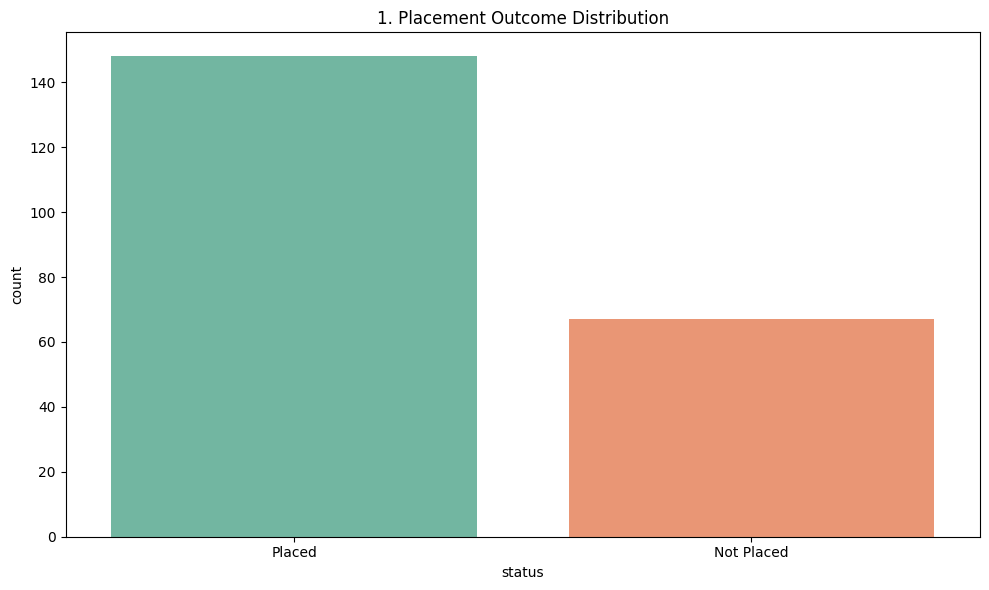

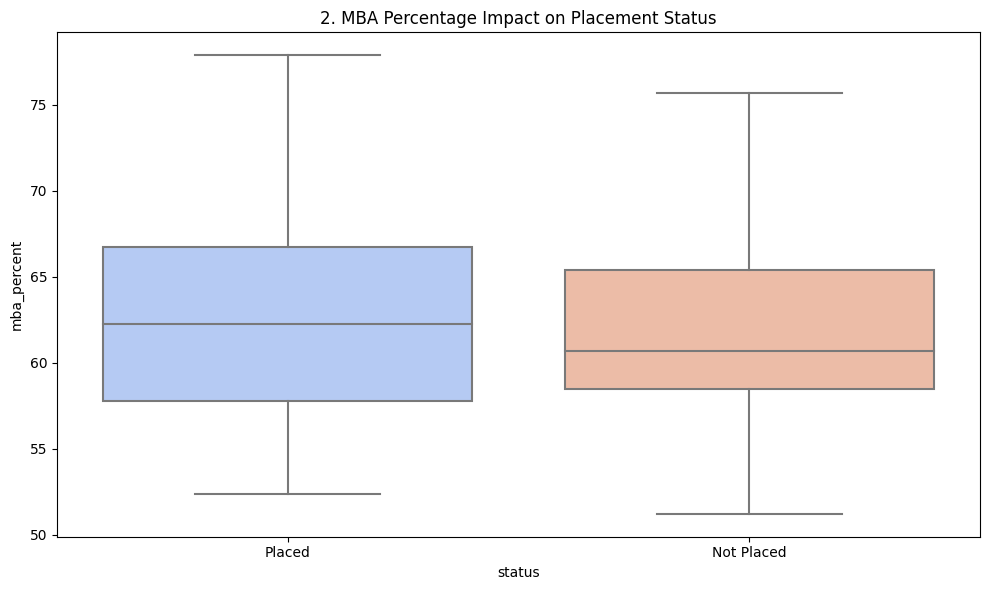

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="status", palette="Set2")
plt.title(f'{plot_no}. Placement Outcome Distribution')
show_fig()
plot_no += 1
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="status", y="mba_percent", palette="coolwarm")
plt.title(f'{plot_no}. MBA Percentage Impact on Placement Status')
show_fig()
plot_no += 1


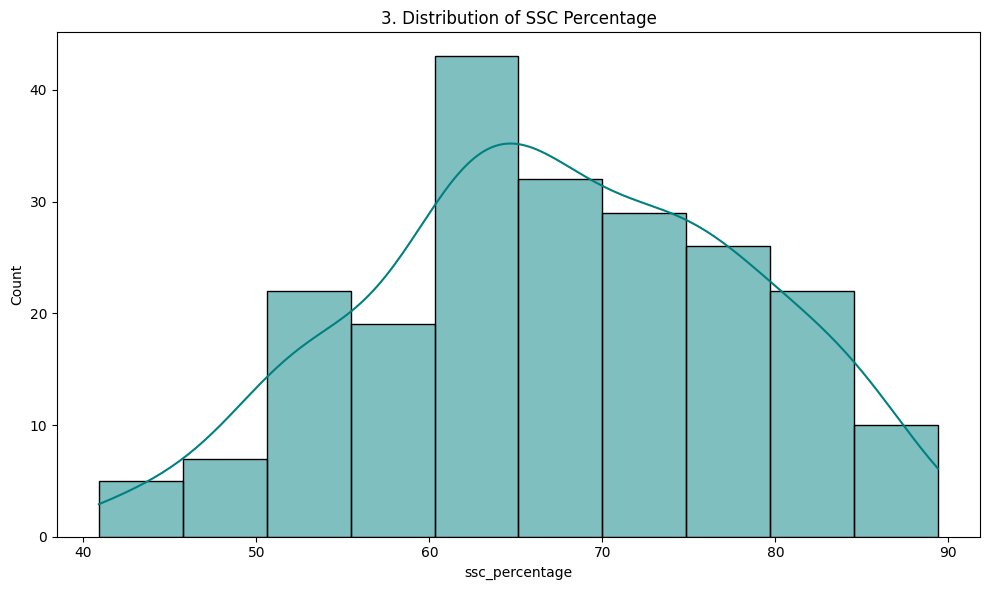

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["ssc_percentage"], kde=True, color="teal")
plt.title(f'{plot_no}. Distribution of SSC Percentage')
show_fig()
plot_no += 1


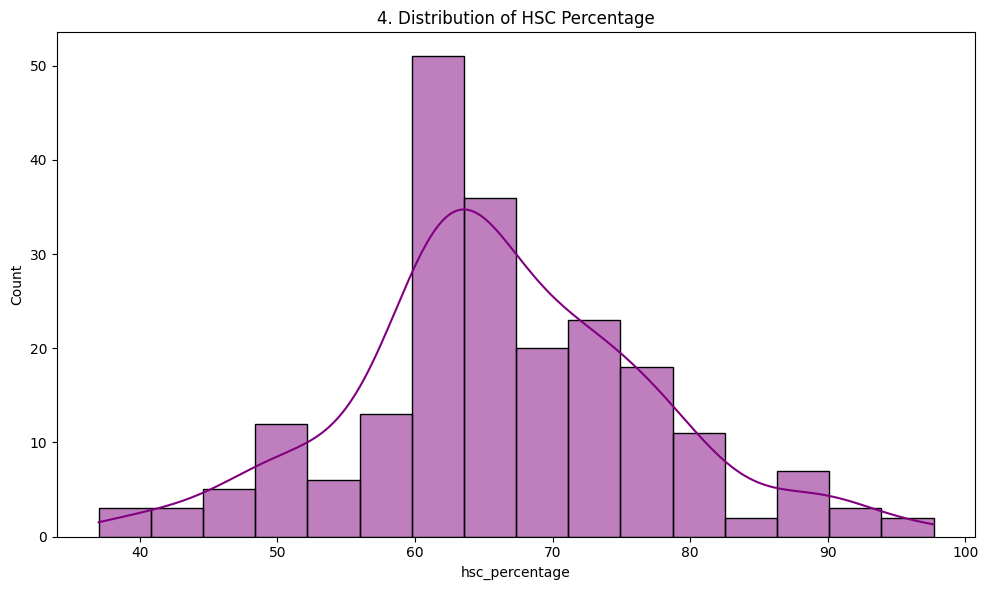

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["hsc_percentage"], kde=True, color="purple")
plt.title(f'{plot_no}. Distribution of HSC Percentage')
show_fig()
plot_no += 1


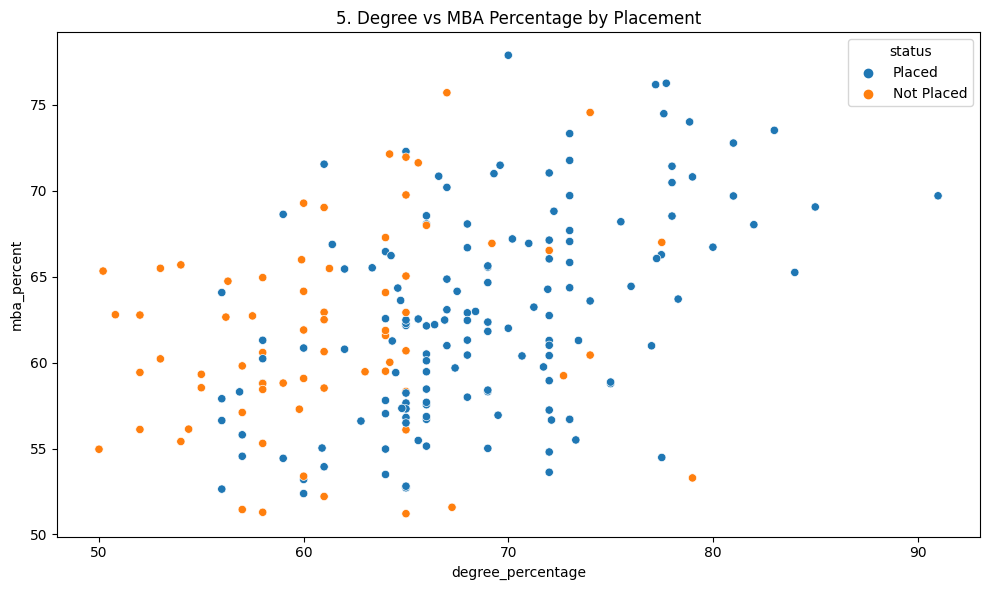

In [16]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="degree_percentage", y="mba_percent", hue="status")
plt.title(f'{plot_no}. Degree vs MBA Percentage by Placement')
show_fig()
plot_no += 1


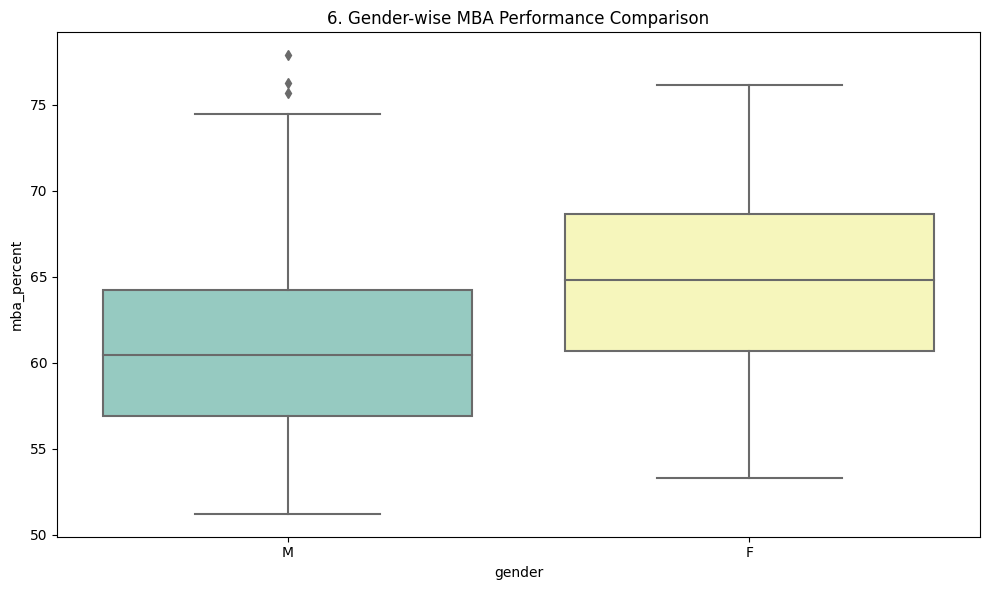

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="gender", y="mba_percent", palette="Set3")
plt.title(f'{plot_no}. Gender-wise MBA Performance Comparison')
show_fig()
plot_no += 1


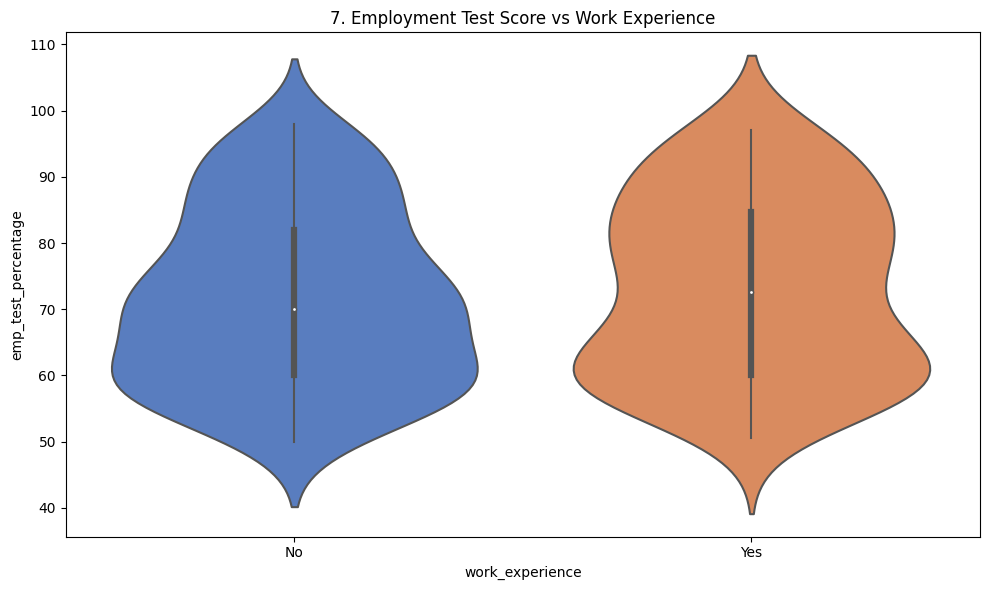

In [18]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="work_experience", y="emp_test_percentage", palette="muted")
plt.title(f'{plot_no}. Employment Test Score vs Work Experience')
show_fig()
plot_no += 1


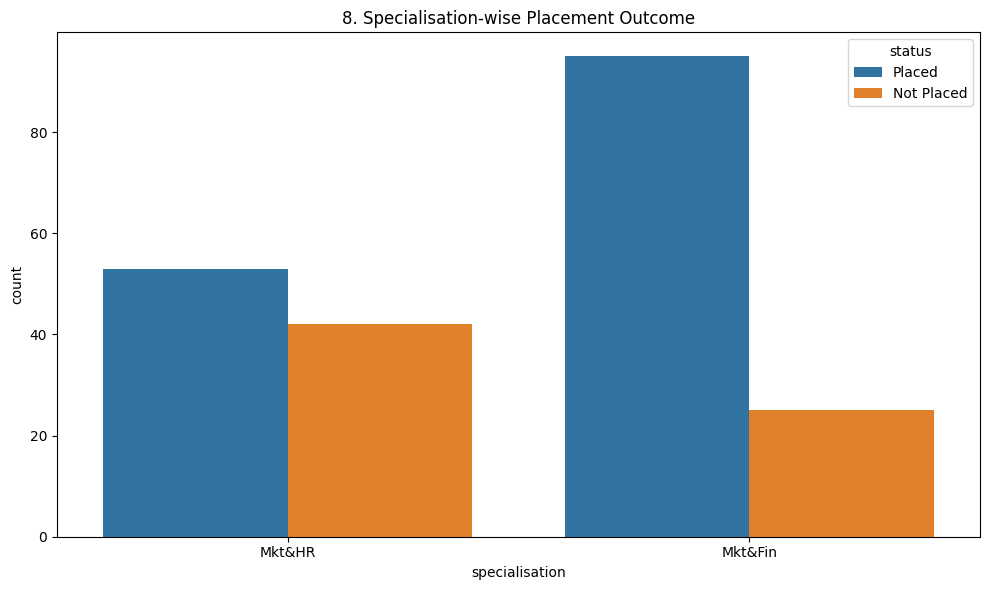

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="specialisation", hue="status")
plt.title(f'{plot_no}. Specialisation-wise Placement Outcome')
show_fig()
plot_no += 1


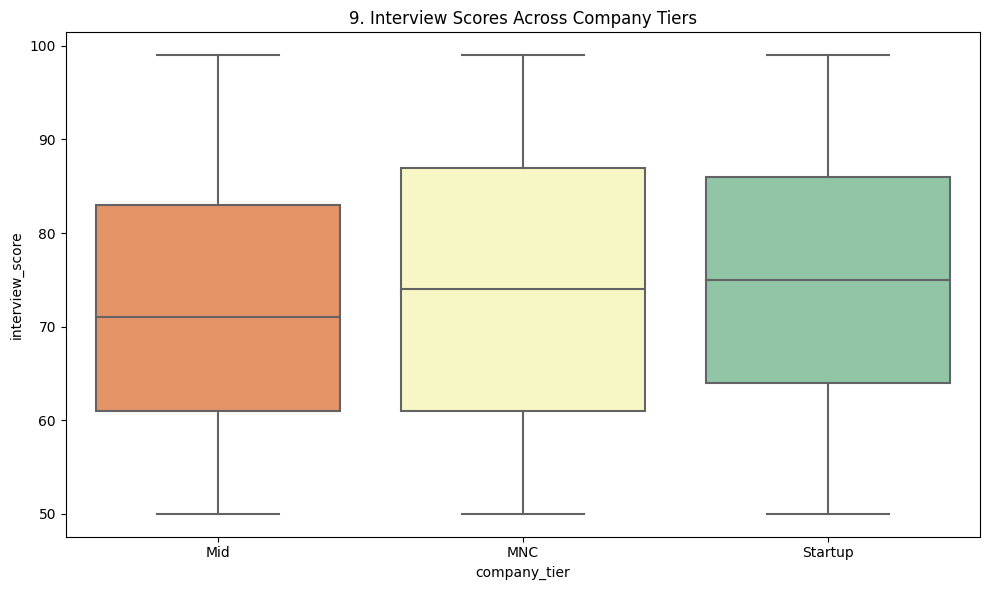

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="company_tier", y="interview_score", palette="Spectral")
plt.title(f'{plot_no}. Interview Scores Across Company Tiers')
show_fig()
plot_no += 1


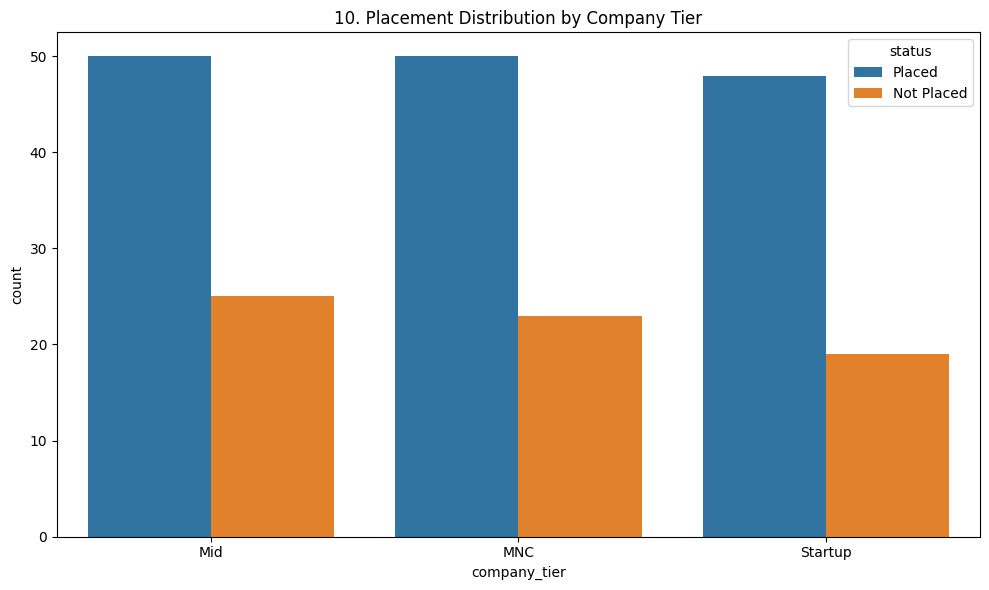

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="company_tier", hue="status")
plt.title(f'{plot_no}. Placement Distribution by Company Tier')
show_fig()
plot_no += 1


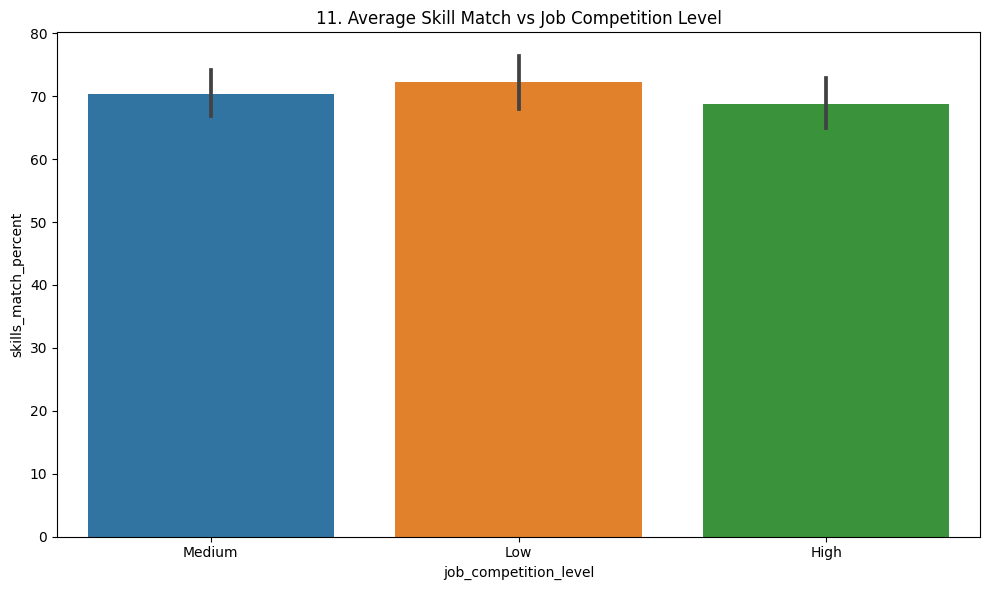

In [22]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x="job_competition_level", y="skills_match_percent", estimator="mean")
plt.title(f'{plot_no}. Average Skill Match vs Job Competition Level')
show_fig()
plot_no += 1


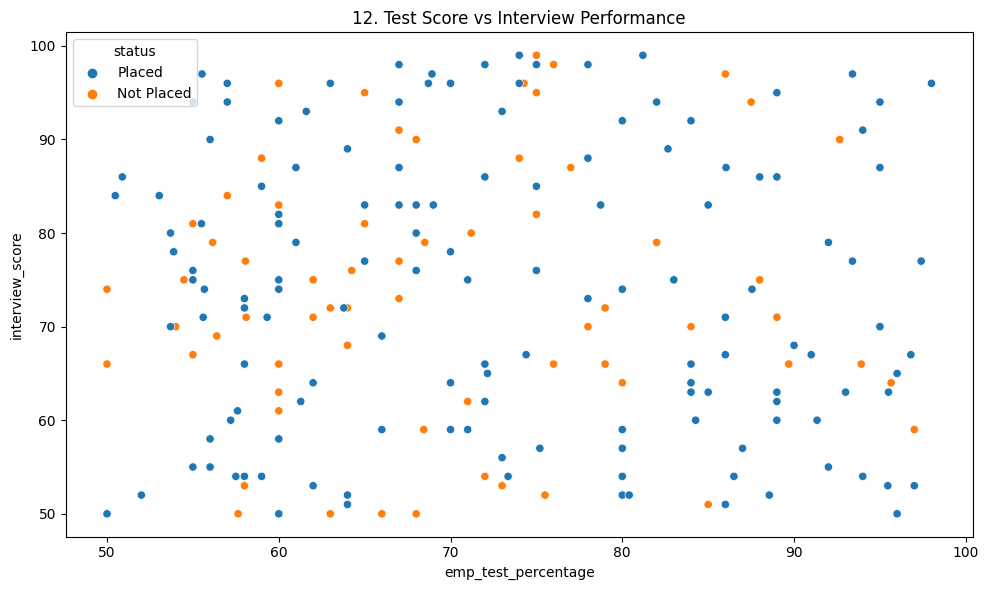

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="emp_test_percentage", y="interview_score", hue="status")
plt.title(f'{plot_no}. Test Score vs Interview Performance')
show_fig()
plot_no += 1


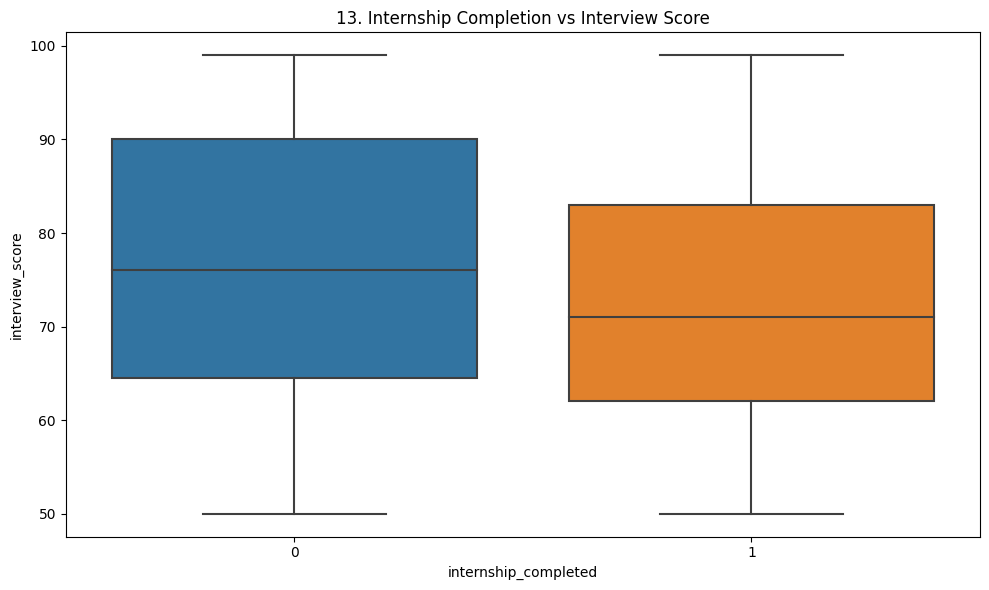

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="internship_completed", y="interview_score")
plt.title(f'{plot_no}. Internship Completion vs Interview Score')
show_fig()
plot_no += 1


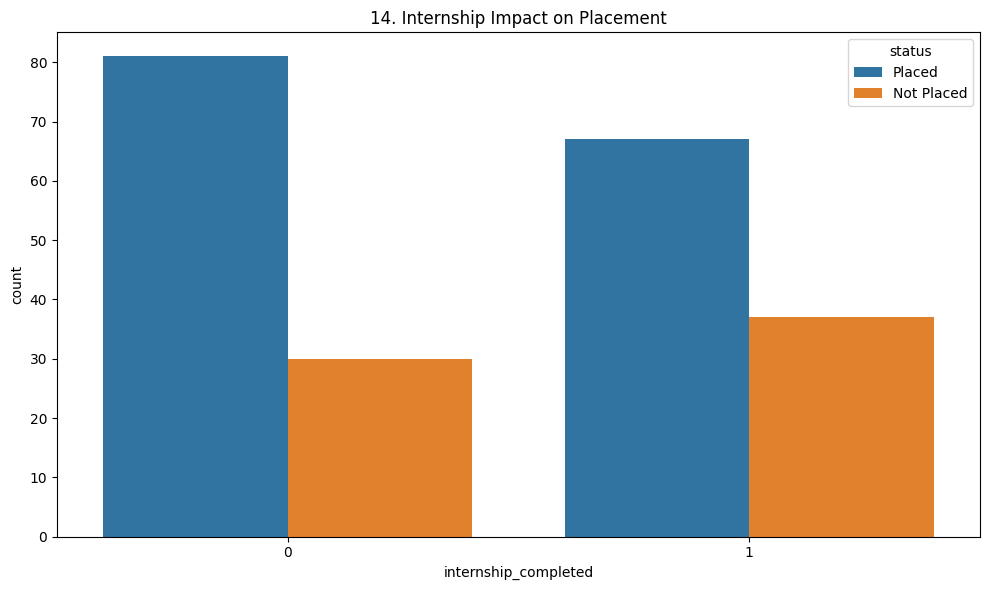

In [25]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="internship_completed", hue="status")
plt.title(f'{plot_no}. Internship Impact on Placement')
show_fig()
plot_no += 1


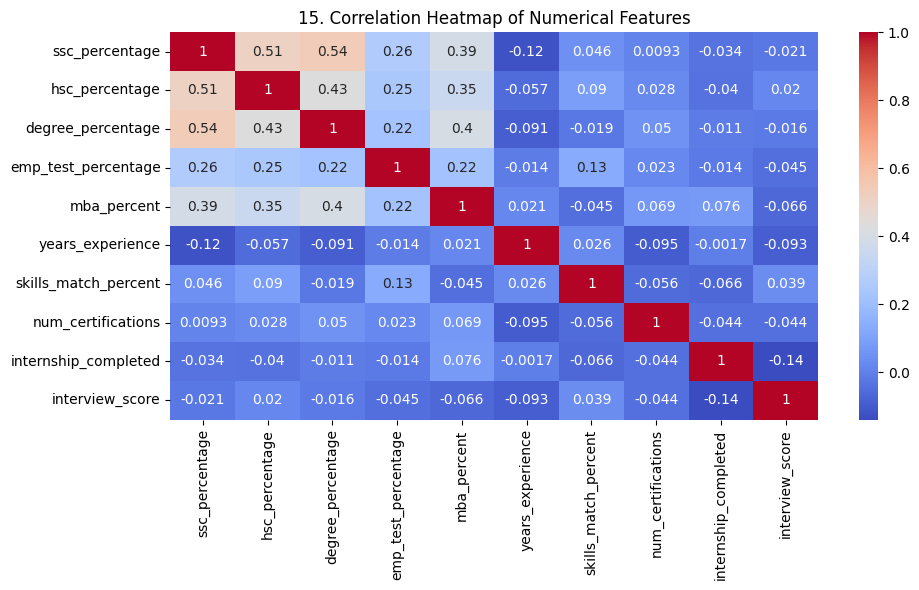

In [26]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="coolwarm", annot=True)
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Features')
show_fig()
plot_no += 1


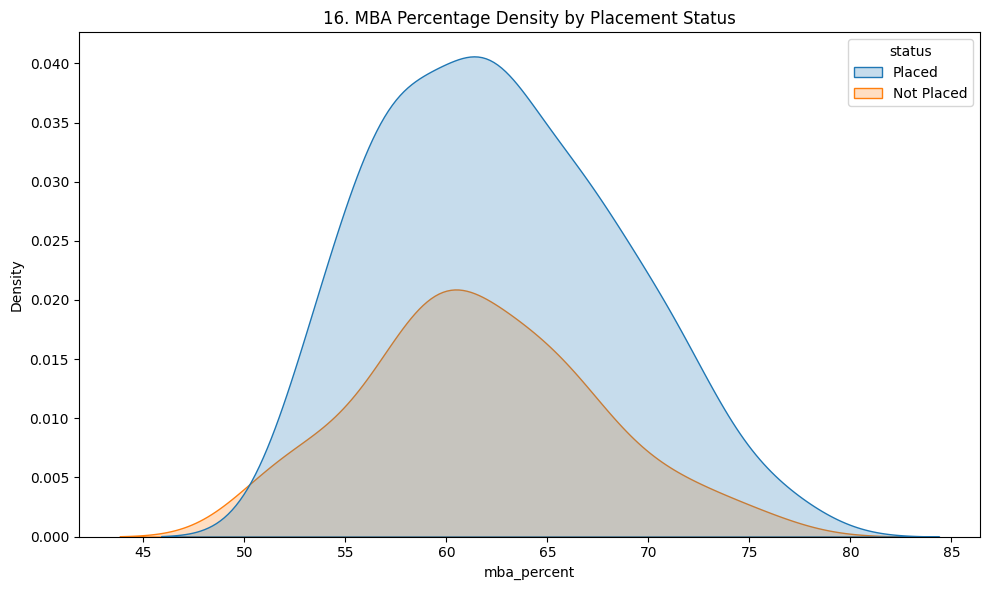

In [27]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="mba_percent", hue="status", fill=True)
plt.title(f'{plot_no}. MBA Percentage Density by Placement Status')
show_fig()
plot_no += 1


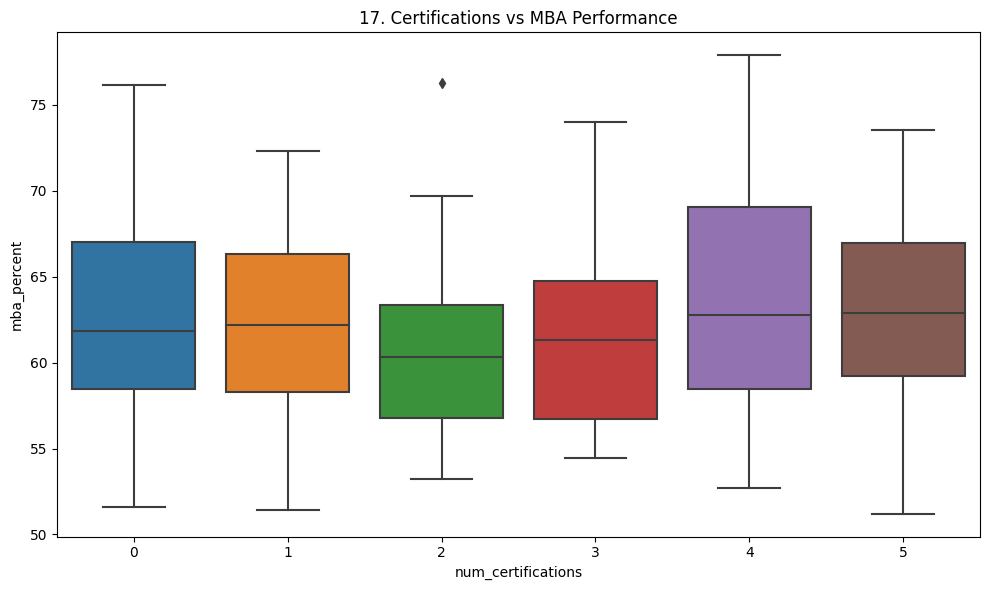

In [28]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="num_certifications", y="mba_percent")
plt.title(f'{plot_no}. Certifications vs MBA Performance')
show_fig()
plot_no += 1


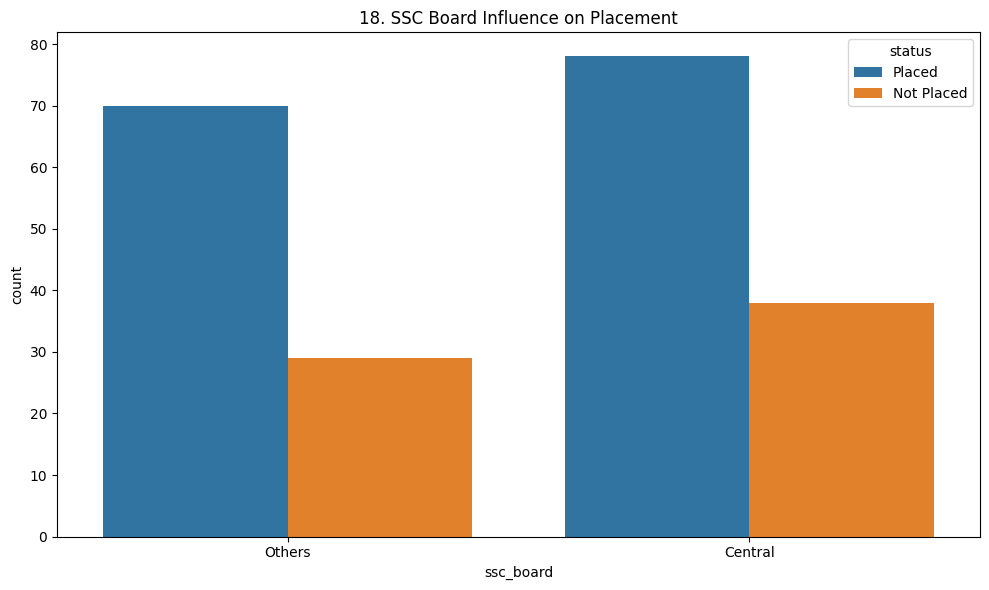

In [29]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="ssc_board", hue="status")
plt.title(f'{plot_no}. SSC Board Influence on Placement')
show_fig()
plot_no += 1


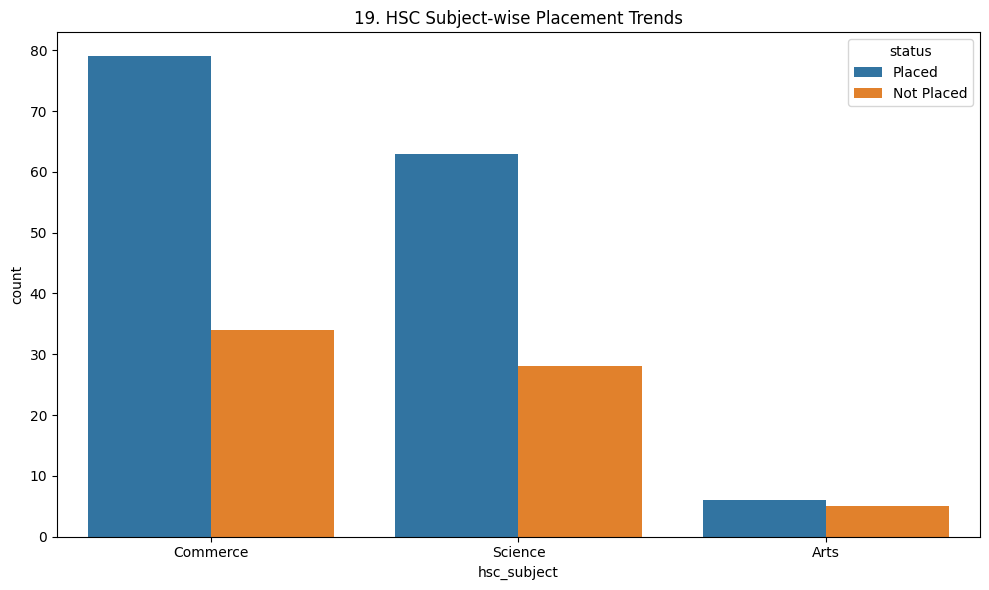

In [30]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="hsc_subject", hue="status")
plt.title(f'{plot_no}. HSC Subject-wise Placement Trends')
show_fig()
plot_no += 1


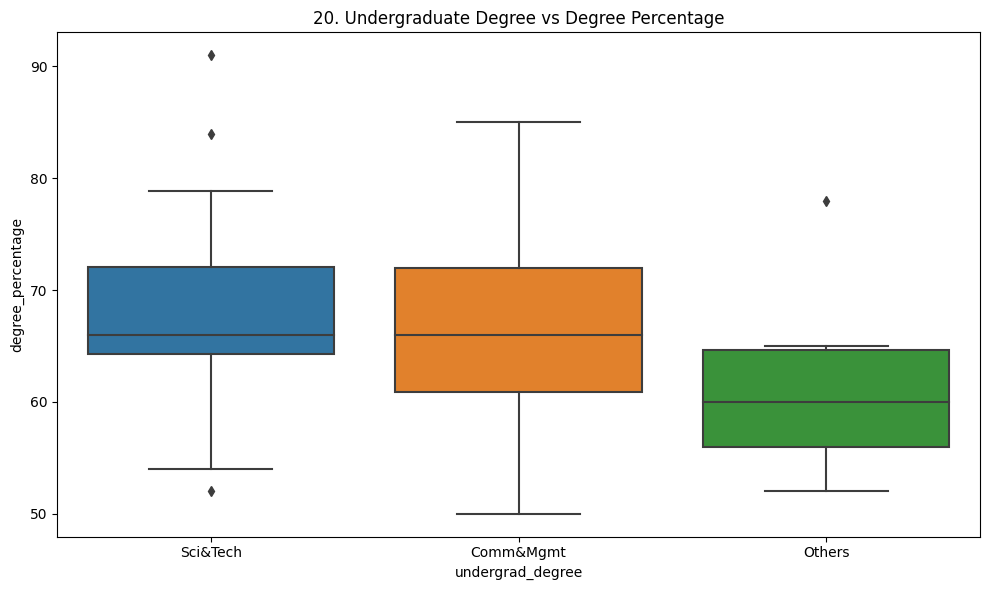

In [31]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="undergrad_degree", y="degree_percentage")
plt.title(f'{plot_no}. Undergraduate Degree vs Degree Percentage')
show_fig()
plot_no += 1


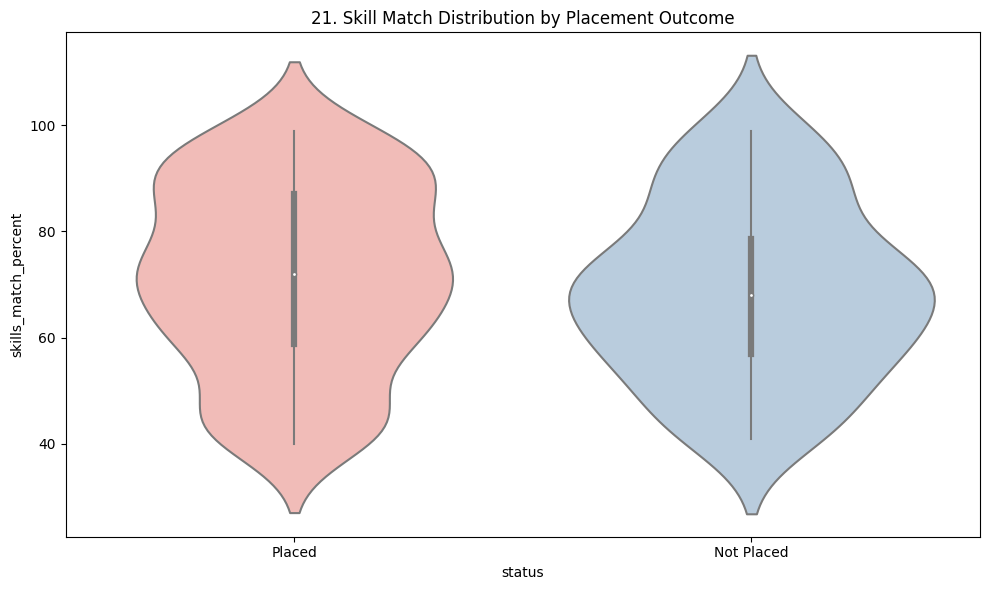

In [32]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="status", y="skills_match_percent", palette="Pastel1")
plt.title(f'{plot_no}. Skill Match Distribution by Placement Outcome')
show_fig()
plot_no += 1


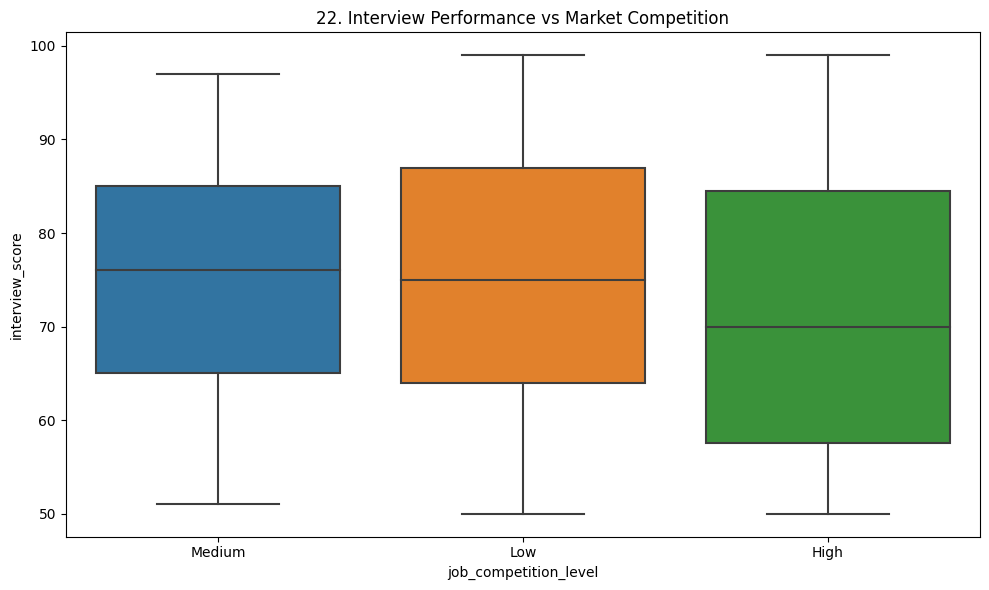

In [33]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="job_competition_level", y="interview_score")
plt.title(f'{plot_no}. Interview Performance vs Market Competition')
show_fig()
plot_no += 1


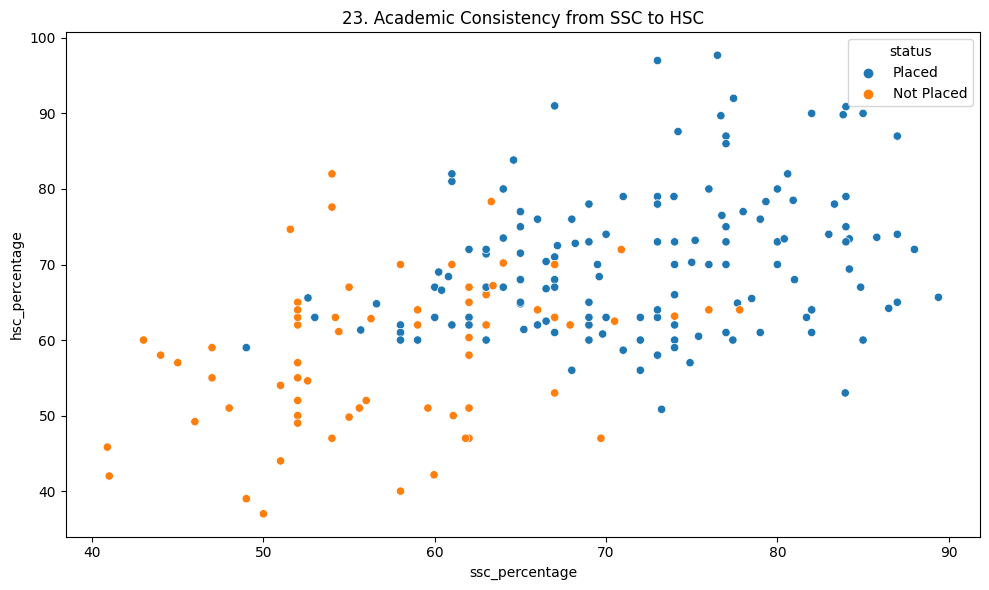

In [34]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="ssc_percentage", y="hsc_percentage", hue="status")
plt.title(f'{plot_no}. Academic Consistency from SSC to HSC')
show_fig()
plot_no += 1


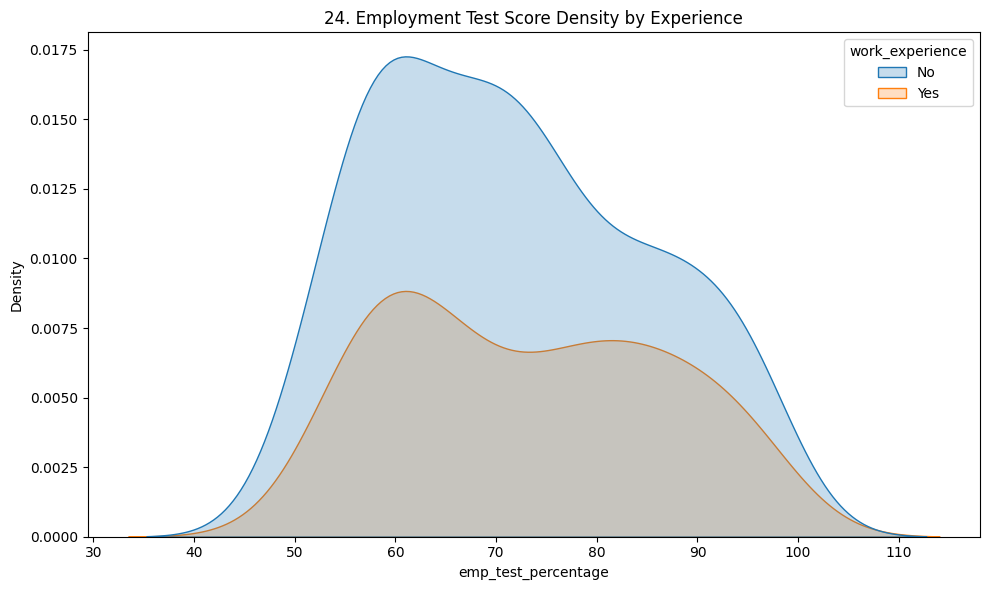

In [35]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="emp_test_percentage", hue="work_experience", fill=True)
plt.title(f'{plot_no}. Employment Test Score Density by Experience')
show_fig()
plot_no += 1


# Model Training

## Placement Status Prediction

In [36]:
# ================================
# 1. SELECT TARGET & FEATURES
# ================================

X = df.drop("status", axis=1)
y = df["status"]


# ================================
# 2. ENCODE CATEGORICAL FEATURES
# ================================

X_encoded = pd.get_dummies(X, drop_first=True)


# ================================
# 3. ENCODE TARGET VARIABLE
# ================================

y_encoded = y.map({"Placed": 1, "Not Placed": 0})


# ================================
# 4. TRAIN TEST SPLIT
# ================================


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# ================================
# 5. FEATURE SCALING
# ================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ================================
# 6. MODEL SELECTION & TRAINING
# ================================

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# ================================
# 7. PREDICTIONS
# ================================

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


# ================================
# 8. MODEL EVALUATION
# ================================

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# ================================
# 9. FEATURE IMPORTANCE ANALYSIS
# ================================

feature_importance = pd.Series(
    model.coef_[0],
    index=X_encoded.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)


# ================================
# 10. SAMPLE PROBABILITY OUTPUT
# ================================

prob_df = pd.DataFrame({
    "Actual_Status": y_test.values,
    "Predicted_Probability": y_prob
})

prob_df.head()

Accuracy: 0.8372093023255814

ROC-AUC Score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.93      0.83      0.88        30

    accuracy                           0.84        43
   macro avg       0.81      0.84      0.82        43
weighted avg       0.85      0.84      0.84        43


Confusion Matrix:
 [[11  2]
 [ 5 25]]


,Actual_Status,Predicted_Probability
0,0,0.918282
1,1,0.999309
2,1,0.997006
3,0,0.178160
4,1,0.971054


## Improved Placement (Random Forest)

In [37]:
# ================================
# 1. TARGET & FEATURES
# ================================

X = df.drop("status", axis=1)
y = df["status"].map({"Placed": 1, "Not Placed": 0})


# ================================
# 2. CATEGORICAL ENCODING
# ================================

X_encoded = pd.get_dummies(X, drop_first=True)


# ================================
# 3. TRAIN TEST SPLIT
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ================================
# 4. RANDOM FOREST MODEL
# ================================

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)


# ================================
# 5. PREDICTIONS
# ================================

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


# ================================
# 6. MODEL EVALUATION
# ================================

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# ================================
# 7. FEATURE IMPORTANCE
# ================================

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importance.head(10)


# ================================
# 8. PLACEMENT PROBABILITY OUTPUT
# ================================

placement_probability = pd.DataFrame({
    "Actual_Status": y_test.values,
    "Predicted_Placement_Probability": y_prob
})

placement_probability.head()


Accuracy: 0.8372093023255814
ROC-AUC: 0.9307692307692308

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43


Confusion Matrix:
 [[ 7  6]
 [ 1 29]]


,Actual_Status,Predicted_Placement_Probability
0,0,0.714194
1,1,0.898086
2,1,0.809516
3,0,0.598237
4,1,0.870915


## Placement Probability / Risk Level

In [38]:
# ================================
# 1. GET PLACEMENT PROBABILITIES
# ================================

placement_prob = rf_model.predict_proba(X_test)[:, 1]


# ================================
# 2. CREATE RISK LEVEL FUNCTION
# ================================

def risk_level(prob):
    if prob >= 0.75:
        return "High Chance"
    elif prob >= 0.45:
        return "Medium Chance"
    else:
        return "Low Chance"


# ================================
# 3. APPLY RISK LEVEL MAPPING
# ================================

risk_levels = pd.Series(placement_prob).apply(risk_level)


# ================================
# 4. CREATE FINAL PREDICTION TABLE
# ================================

final_prediction = pd.DataFrame({
    "Actual_Status": y_test.map({1: "Placed", 0: "Not Placed"}).values,
    "Placement_Probability": placement_prob,
    "Risk_Level": risk_levels.values
})


# ================================
# 5. SORT BY PLACEMENT PROBABILITY
# ================================

final_prediction = final_prediction.sort_values(
    by="Placement_Probability",
    ascending=False
)


# ================================
# 6. DISPLAY SAMPLE OUTPUT
# ================================

final_prediction.head(10)

,Actual_Status,Placement_Probability,Risk_Level
23,Placed,0.944056,High Chance
15,Placed,0.941663,High Chance
24,Placed,0.938955,High Chance
9,Placed,0.914122,High Chance
26,Placed,0.911563,High Chance
34,Placed,0.911119,High Chance
13,Placed,0.900885,High Chance
1,Placed,0.898086,High Chance
7,Placed,0.884132,High Chance
31,Placed,0.875704,High Chance
